# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [5]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_line
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

penguins.select_dtypes("object").columns
penguins_dum = pd.get_dummies(penguins, drop_first=True)
penguins_dum.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,False,False,False,True,False
3,NaN,NaN,NaN,NaN,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,False,False,False,True,False


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

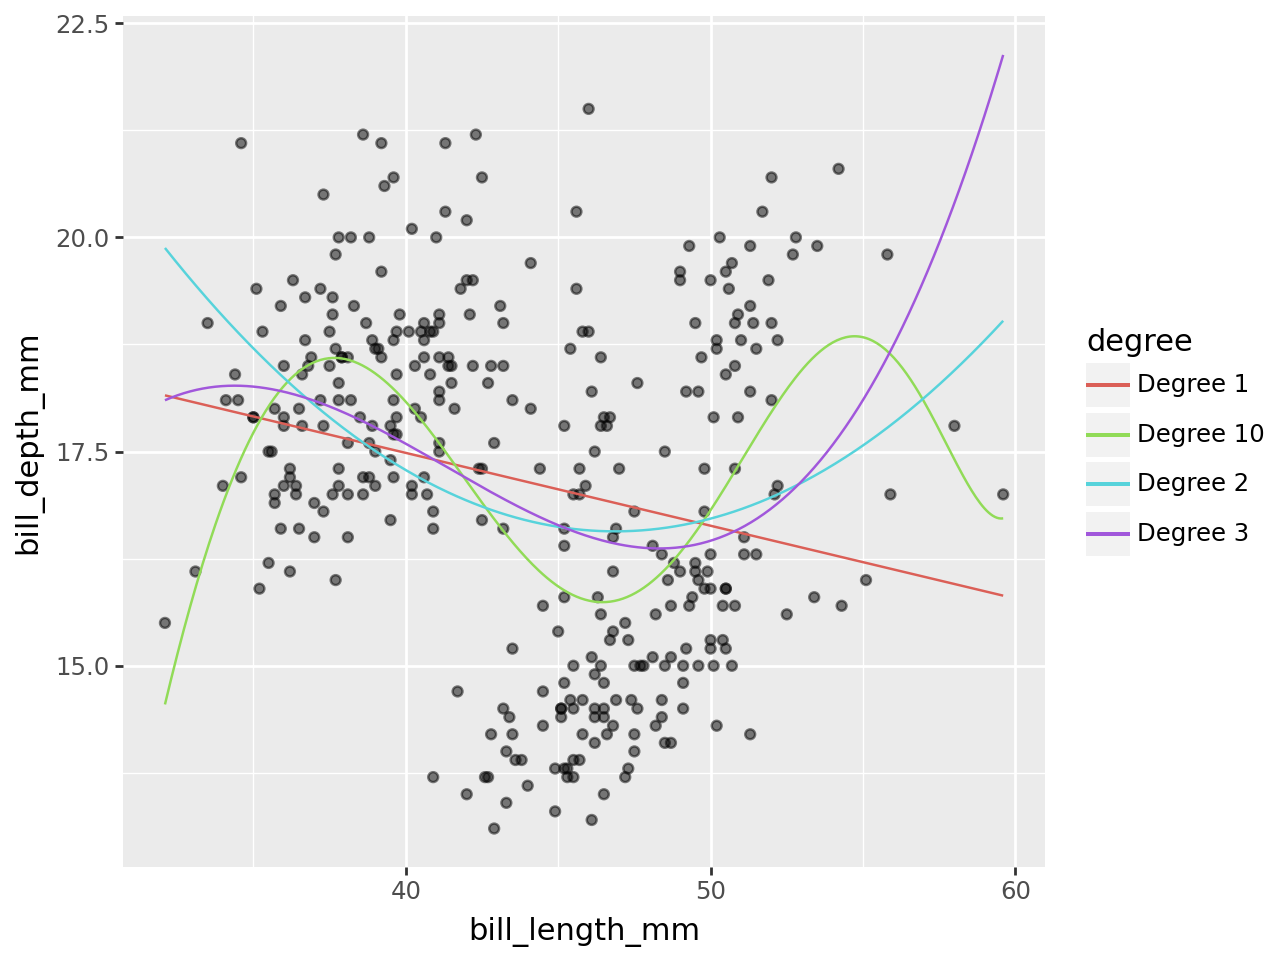

In [6]:
# Code Here
df = penguins[["bill_length_mm","bill_depth_mm"]].dropna()
X = df[["bill_length_mm"]].values; y = df["bill_depth_mm"].values
xs = np.linspace(X.min(), X.max(), 400).reshape(-1,1)

pred = []
for d in [1,2,3,10]:
    P = PolynomialFeatures(d).fit(X)
    M = LinearRegression().fit(P.transform(X), y)
    pred.append(pd.DataFrame({
        "bill_length_mm": xs.ravel(),
        "bill_depth_hat": M.predict(P.transform(xs)),
        "degree": f"Degree {d}"
    }))
pred = pd.concat(pred, ignore_index=True)

(ggplot(df, aes("bill_length_mm","bill_depth_mm"))
    + geom_point(alpha=.5)
    + geom_line(pred, aes("bill_length_mm","bill_depth_hat", color="degree")))

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The degree 1 linear model is underfitting the line is too simple and misses the clear curvature in the data.

The degree 10 model is overfitting it wiggles up and down, following random noise instead of the main trend.

The degree 2 or 3 model fits best it captures the smooth curved relationship without too much fluctuation.